In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
covid_data=pd.read_csv("/content/drive/MyDrive/Covid-19 Dataset/Covid Dataset.csv")

In [ ]:
covid_data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No


In [ ]:
covid_data.shape[1]

21

In [ ]:
covid_data.isnull().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

In [ ]:
covid_data.shape

(5434, 21)

In [ ]:
covid_data.describe().transpose()

,count,unique,top,freq
Breathing Problem,5434,2,Yes,3620
Fever,5434,2,Yes,4273
Dry Cough,5434,2,Yes,4307
Sore throat,5434,2,Yes,3953
Running Nose,5434,2,Yes,2952
Asthma,5434,2,No,2920
Chronic Lung Disease,5434,2,No,2869
Headache,5434,2,Yes,2736
Heart Disease,5434,2,No,2911
Diabetes,5434,2,No,2846


In [ ]:
covid_data['COVID-19'].unique()

array(['Yes', 'No'], dtype=object)

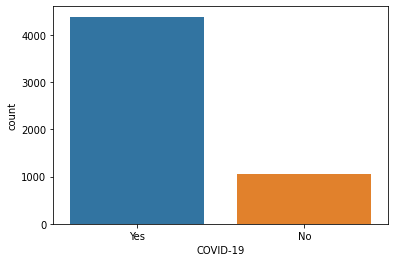

In [ ]:
sns.countplot(x='COVID-19',data=covid_data)
plt.show()

In [ ]:
def func(d):
  if d=='Yes':
    return 1;
  else:
    return 0;  

In [ ]:
for column in covid_data:
  covid_data[column]=covid_data[column].apply(func)


In [ ]:
covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1


In [ ]:
train_dataset = covid_data.sample(frac=0.8,random_state=0)
test_dataset = covid_data.drop(covid_data["COVID-19"])

In [ ]:
train_labels = train_dataset.pop('COVID-19')
test_labels = test_dataset.pop('COVID-19')

In [ ]:
train_labels

5145    1
502     1
2550    1
2260    1
3641    1
       ..
814     1
2256    1
4072    1
4112    0
2020    1
Name: COVID-19, Length: 4347, dtype: int64

In [ ]:
train_dataset.shape

(4347, 20)

In [ ]:
test_dataset.shape

(5432, 20)

In [ ]:
model=keras.Sequential([layers.Dense(64,activation='relu',input_shape=[len(train_dataset.keys())]),
keras.layers.Dense(14,activation='relu'),
keras.layers.Dense(104,activation='relu'),
keras.layers.Dense(144,activation='relu'),
keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_dataset,train_labels,epochs=100)

Epoch 1/100
136/136 [==============================] - 1s 2ms/step - loss: 0.2380 - accuracy: 0.8981
Epoch 2/100
136/136 [==============================] - 0s 2ms/step - loss: 0.0741 - accuracy: 0.9696
Epoch 3/100
136/136 [==============================] - 0s 2ms/step - loss: 0.0556 - accuracy: 0.9752
Epoch 4/100
136/136 [==============================] - 0s 2ms/step - loss: 0.0509 - accuracy: 0.9761
Epoch 5/100
136/136 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9791
Epoch 6/100
136/136 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.9807
Epoch 7/100
136/136 [==============================] - 0s 2ms/step - loss: 0.0460 - accuracy: 0.9781
Epoch 8/100
136/136 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9800
Epoch 9/100
136/136 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9798
Epoch 10/100
136/136 [==============================] - 0s 2ms/step - loss: 0.0416 - accura

In [ ]:
test_loss,test_acc = model.evaluate(test_dataset,test_labels)

170/170 [==============================] - 0s 1ms/step - loss: 0.0321 - accuracy: 0.9827


In [ ]:
test_dataset

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0
5,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
6,1,1,1,0,0,0,1,0,1,1,1,1,1,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0
5430,1,1,1,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0
5431,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_dataset.keys()

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market'],
      dtype='object')

In [ ]:
model.predict([[1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0]]).dtype

dtype('float32')

In [ ]:
if(model.predict([[1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0]])[0][0]==1):
  print("you have covid-19")
else:
  print("You have not covid")  

you have covid-19


In [ ]:
test_labels

2       1
3       1
4       1
5       1
6       1
       ..
5429    1
5430    1
5431    0
5432    0
5433    0
Name: COVID-19, Length: 5432, dtype: int64

In [ ]:
keras_file= "covid19.h5"
tf.keras.models.save_model(model,keras_file)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open("covid19.tflite","wb").write(tfmodel)

INFO:tensorflow:Assets written to: /tmp/tmph4cy4bbx/assets


78864

In [ ]:
##For Web Version

In [ ]:
covid_data.tail()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
5429,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
5433,1,1,1,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
# input Variable
X=covid_data.drop(['COVID-19'],axis=1)
y=covid_data['COVID-19']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2020)
# spilitting of data in X_train,X_test,y_train,y_test

In [ ]:
#SVC

In [ ]:
from sklearn.svm import SVC
support_vector_classifier=SVC(kernel='rbf')# we use that in bydeafault parameter
support_vector_classifier.fit(X_train,y_train)
support_vector_classifier.score(X_test,y_test)

0.9724011039558418

In [ ]:
#KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnc=KNeighborsClassifier(n_neighbors=5,p=2)
knnc.fit(X_train,y_train)
knnc.score(X_test,y_test)

0.9779208831646734

In [ ]:
#LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9678012879484821

In [ ]:
#DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

0.9806807727690893

In [ ]:
#RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier( n_estimators=200,criterion='gini')
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9806807727690893

In [ ]:
#XGBClassifier

In [ ]:
from xgboost import XGBClassifier
XGB_Classifier=XGBClassifier()
XGB_Classifier.fit(X_train,y_train)
XGB_Classifier.score(X_test,y_test)

0.9714811407543699

In [ ]:
#For saving the model

In [ ]:
import pickle
with open("covidPrediction.pkl","wb+") as f:
    pickle.dump(dtc,f)

In [ ]:
import joblib
filename='covid19_Prediction.sav'
joblib.dump(dtc,filename)
#if You want to use that model
model2=joblib.load('covid19_Prediction.sav')

In [ ]:
model=pickle.load(open('covidPrediction.pkl','rb+'))

In [ ]:
patient1=[1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0]
patient2=[1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0]

In [ ]:
import numpy as np
#Convert the data to 2D array
patient1=np.array([patient1])
patient1
patient2=np.array([patient2])
patient2

array([[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
pred=model.predict(patient2)

In [ ]:
if pred[0]==0:
    print("you dont have corona")
else:
    print("you amy have corona")

you dont have corona
